<a href="https://moodle.mimuw.edu.pl/pluginfile.php/270319/mod_resource/content/6/SML_2023_project_1.pdf">Treść zadania</a>

Task configuration

In [74]:
"""Main libraries"""
import pandas as pd
import numpy as np

"""For preety prints"""
import json
from pprint import pprint
from pygments import highlight, lexers, formatters

**Task 1**

Code to load data and get basic information:

In [75]:
df = pd.read_csv('earnings.csv', sep=';')
print(f"There are {df.shape[0]} observations in the sample.")
print(f"Dataset contains following columns: {df.columns.values.tolist()}")
print(f"Total number of null values is {np.sum(df.isnull().sum().values)}.")
df

There are 11000 observations in the sample.
Dataset contains following columns: ['id', 'base', 'bonus', 'overtime_pay', 'other', 'sector', 'section_07', 'sex', 'education', 'contract', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
Total number of null values is 0.


,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
0,192064,26651.53,0.00,0.00,0.00,1,3,2,4,1,49,33.03,7.06,1524.15,0.0
1,25495,40168.50,1500.00,0.00,3414.32,1,2,1,1,1,36,10.07,6.01,1562.40,0.0
2,142164,20134.80,0.00,0.00,1700.41,1,2,2,4,1,52,28.08,19.05,1816.00,0.0
3,198034,16475.00,0.00,0.00,1305.00,1,2,2,5,1,55,35.07,11.01,1816.00,0.0
4,144990,34797.60,0.00,1893.35,3118.73,1,2,2,2,1,50,27.00,19.01,722.80,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,41597,36573.22,1323.65,1276.80,3337.32,1,2,2,2,1,50,27.02,27.02,766.80,40.0
10996,120022,28280.00,5470.00,0.00,2385.13,1,1,2,4,1,41,18.08,15.09,1792.00,0.0
10997,41800,109316.96,0.00,0.00,9042.58,1,1,2,2,1,47,20.02,1.07,1656.00,0.0
10998,153849,57721.35,6950.00,0.00,4906.32,1,1,2,2,1,47,28.01,21.10,1784.00,0.0


- There are 11000 observations in the sample.
- Dataset contains following quantitative columns:
  - base
  - bonus
  - overtime_pay
  - other
  - age
  - duration_total
  - duration_entity
  - duration_nominal
  - duration_overtime
- Dataset contains following qualitative columns:
  - sector
  - section_07
  - sex
  - education
  - contract
- Dataset also contains column id but it is just unique index.
- Data set does not contain missing data (null values).

In [76]:
# Descriptive statistics for quantitative columns
quantitative_columns = ['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
quantitative_data = df[quantitative_columns]
quantitative_data.describe()

,base,bonus,overtime_pay,other,age,duration_total,duration_entity,duration_nominal,duration_overtime
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.00000,11000.000000,11000.000000,11000.000000
mean,33376.738065,2128.486176,1679.273923,2477.625815,42.470182,18.56708,11.401382,1301.307435,47.702325
std,19276.551638,4966.444726,5407.964344,3715.419120,10.012140,10.99695,9.322181,540.189234,111.963867
min,10.000000,0.000000,0.000000,0.000000,19.000000,0.01000,0.010000,12.800000,0.000000
25%,20995.115000,0.000000,0.000000,0.000000,34.000000,9.03000,3.070000,766.800000,0.000000
50%,31341.245000,620.000000,0.000000,2141.820000,43.000000,19.03500,9.100000,1591.900000,0.000000
75%,41348.290000,2940.717500,1139.330000,3497.430000,51.000000,27.11000,18.040000,1768.000000,40.000000
max,241624.390000,258061.000000,228110.340000,88555.760000,77.000000,57.02000,46.010000,2024.000000,1812.580000


In [77]:
indices = {
    'sector': {
        1: 'public', 
        2: 'private'
    },
    'section_07': {
        1: 'Public Administration and Defence; Compulsory Social Security',
        2: 'Education',
        3: 'Human Health and Social Work Activities)'
    },
    'sex': {
        1: 'man',
        2: 'woman'
    },
    'education': {
        1: 'doctorate', 
        2: 'higher',
        3: 'post-secondary', 
        4: 'secondary', 
        5: 'basic vocational',
        6: 'middle school and below'
    },
    'contract': {
        1: 'for an indefinite period', 
        2: 'for a definite period'
    }
}

frequency_tables = {
    column: df[column].value_counts().rename(index=idx).to_dict() for column, idx in indices.items()
}

def preety_print(dict):
    print(highlight(json.dumps(frequency_tables, indent=4), lexers.JsonLexer(), formatters.Terminal256Formatter(style="github-dark")))

preety_print(frequency_tables)

{
    "sector": {
        "public": 10548,
        "private": 452
    },
    "section_07": {
        "Education": 5867,
        "Human Health and Social Work Activities)": 2732,
        "Public Administration and Defence; Compulsory Social Security": 2401
    },
    "sex": {
        "woman": 8289,
        "man": 2711
    },
    "education": {
        "higher": 6633,
        "secondary": 1983,
        "basic vocational": 906,
        "post-secondary": 680,
        "doctorate": 430,
        "middle school and below": 368
    },
    "contract": {
        "for an indefinite period": 9306,
        "for a definite period": 1694
    }
}



**Histograms**
- Present and discuss (where appropriate) variables’ distributions
- especially compare them with the normal distribution 
- (e.g. with histograms, density functions, qqplots...)

array([[<Axes: title={'center': 'base'}>,
        <Axes: title={'center': 'bonus'}>,
        <Axes: title={'center': 'overtime_pay'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration_total'}>],
       [<Axes: title={'center': 'duration_entity'}>,
        <Axes: title={'center': 'duration_nominal'}>,
        <Axes: title={'center': 'duration_overtime'}>]], dtype=object)

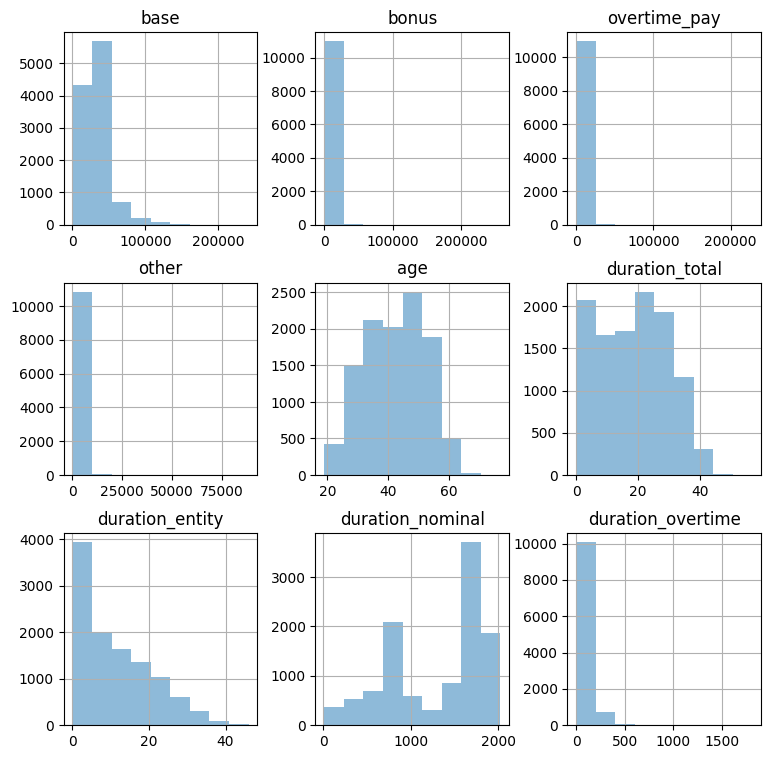

In [81]:
quantitative_bins = quantitative_data.shape[1]
quaititative_height = quantitative_bins
quantitative_data.hist(bins=quantitative_bins, alpha=0.5, figsize=(quantitative_bins, quaititative_height))